In [1]:
# Imports
import numpy as np
import matplotlib.pyplot as plt
from scipy import optimize
import ipywidgets as widgets
import sympy as sm
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import math
import itertools
import time
from matplotlib.ticker import FuncFormatter

# Problem 1: Human capital accumulation

# Question 1.1

In this question we will solve the model in period two, where we take the level of human capital as given.

In [2]:
# Defining parameters
rho = 2
beta = 0.96
gamma_1 = 0.1
w = 2
b_1 = 1
Delta = .1
h_vec = np.linspace(0.1,1.5,100)

In [3]:
## This section defines a bunch of functions in order to solve the model in period 2.

# Defining the utility function
def utility_1(c,rho):
    """ 
    The utility function 

    Args: 
        c (type: float): The consumption
        rho (type: float): The coeffcient of relative risk aversion. Has to be positive.

    Returns: 
        The utility (float) given consumption and a coeffcient of relative risk aversion.      
    """
    
    return c**(1-rho)/(1-rho)


# Defining the net utility given level of human capital, labor supply and parameters
def v2(h2,l2,rho,gamma,w,b):
    """ 
    The net utility taking account for disutility of working 

    Args: 
        h2 (type: float, list): Level of human capital
        l2 (type: int, boolean): Dummy of working (l2=1) or not working (l2=0)
        rho (type: float): The coeffcient of relative risk aversion. Has to be positive.
        gamma (type: float): Meassuring the disutility of working. Has to be posistive.
        w (type: float): The wage. Has to be positive.
        b (type: float): The level of benefits if not working. Has to be positive.

    Returns: 
        The net utility (float,list) given level of human capital, labor supply and parameters.      
        The type depends on the type of h2
    """
    
    if l2 == 0: # Calculate the utility if not working
        return utility_1(b,rho)
    if l2 == 1: # Calculate the utility if working 
        return utility_1(w*h2,rho)-gamma*l2



# Defining function of the cutoff level of human capital so a person will choose to work in the second period
def h_cutoff(rho,gamma,w,b):
    """ 
    The cutoff level of human capital so a person will choose to work in the second period

    Args: 
        rho (type: float): The coeffcient of relative risk aversion. Has to be positive.
        gamma (type: float): Meassuring the disutility of working. Has to be posistive.
        w (type: float): The wage. Has to be positive.
        b (type: float): The level of benefits if not working. Has to be positive.

    Returns: 
        A value of human capital (float)     
    """
    
    # Defining function that is the squared difference between net utility of working and not working
    obj = lambda h: (v2(h,1,rho,gamma,w,b)-v2(h,0,rho,gamma,w,b))**2
    x0 = 0 # Initial guess
    
    # Find the cutoff value by minimizing the squared difference
    res_temp = optimize.minimize_scalar(obj,x0,method='bounded',bounds=[0,10])

    return res_temp.x
    

# Define a function to 
def opt2(u2_nowork,u2_work):
    """ 
    Solves the model in the second period based on the utility of working and not working

    Args: 
        u2_nowork (type: list, tuple ndarray): A vector of utility if not working
        u2_work (type: list, tuple ndarray): A vector of utility if working

    Returns: 
        u2_opt: A vector (ndarray) of the optimal utility for different levels of human capital 
        l2_opt: A vector (list) of the optimal labor supply for different levels of human capital 
    """  
    
    # Create a new vector that is the maximum of the two utility vectors above 
    u2_opt = np.maximum(u2_work,u2_nowork)

    l2_opt = [] # Empty list for later purpose
    
    # Appending the optimal labor supply to the 'l2_opt'-list. Takes the value 1 
    # if utility of working is greater than the utility of not working
    for i in range(len(h_vec)):
        if u2_work[i]>=u2_nowork[i]:
            l2_opt.append(1)
        else:
            l2_opt.append(0)
   
    return u2_opt, l2_opt


# Defining a function which solves the model in the second period
def sol2(h_vec,rho,gamma,beta,w,b):
    """ 
    Solves the model in the second period taking the level of human capital 
    as given (not as a function of human capital and labor supply in the first period)

    Args: 
        h_vec (type: list, tuple, ndarray): Vector of different levels of human capital
        rho (type: float): The coeffcient of relative risk aversion. Has to be positive.
        gamma (type: float): Meassuring the disutility of working. Has to be posistive.
        w (type: float): The wage. Has to be positive.
        b (type: float): The level of benefits if not working. Has to be positive.

    Returns: 
        u2_nowork: A vector (ndarray) of the utility if not working for different levels of human capital 
        u2_work: A vector (ndarray) of the utility if  working for different levels of human capital 
        u2_opt: A vector (ndarray) of the optimal utility for different levels of human capital 
        l2_opt: A vector (list) of the optimal labor supply for different levels of human capital 
    """  
    
    # Generates two vectors: the net utility if working or not working for different levels of human capital
    u2_nowork = np.zeros(len(h_vec)) + v2(h_vec,0,rho,gamma,w,b)
    u2_work = v2(h_vec,1,rho,gamma,w,b)

    u2_opt, l2_opt = opt2(u2_nowork, u2_work)
    
    return u2_nowork, u2_work, u2_opt, l2_opt

The worker will choose to work if h > 0.556
 


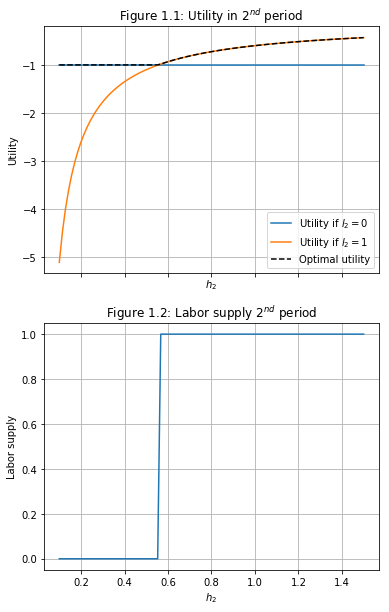

In [4]:
# This part solves the model in the second period and plots the utility and labor supply

# Call the optimal utility and labor supply as well as the utility of working and not 
u2_nowork, u2_work, u2_opt, l2_opt = sol2(h_vec,rho,gamma_1,beta,w,b_1)


# Plotting the utility levels and optimal level of labor supply
fig, (ax1, ax2) = plt.subplots(nrows=2, ncols=1, sharex=True, figsize=(6,10))

# Sub_fig 1
ax1.plot(h_vec,u2_nowork,label='Utility if $l_2=0$')
ax1.plot(h_vec,u2_work, label='Utility if $l_2=1$')
ax1.plot(h_vec,u2_opt, linestyle='dashed', color='black', label='Optimal utility')
ax1.grid()
ax1.legend(loc='lower right')
ax1.set_xlabel('$h_2$')
ax1.set_ylabel('Utility')
ax1.set_title('Figure 1.1: Utility in $2^{nd}$ period');

# Sub_fig two
ax2.plot(h_vec,l2_opt)
ax2.grid()
ax2.set_xlabel('$h_2$')
ax2.set_ylabel('Labor supply')
ax2.set_title('Figure 1.2: Labor supply $2^{nd}$ period');

print(f'The worker will choose to work if h > {h_cutoff(rho,gamma_1,w,b_1):.3}\n ')

Figure 1.1 and 1.2 show the utility and the optimal labor supply in the second period, respectively, for given values of $h_2$. If the worker does not work the utility will be the same regardless of the value of $h_2$ as the consumption is equal to the benefits. In contrast, the utility is increasing in human capital if the worker works because the consumption increases in $h_2$. Due to the disutility and low potential consumption, it is optimal for the worker not to work if the level of human capital is low. It will be optimal to be unemployed as long as the level of human capital is below 0.56. With higher levels of human capital it will be better to work as the utility from the higher consumption, more than compensate for the disutility of working.

## Question 1.2

In this question we will solve the model in the first period given the level of human capital.

In [5]:
# This part defines different functions to solve the model in the first period 

# Creating the expected level of human capital in period 2
def h2_exp(h1,l1,Delta):
    """ 
    The expected value of human capital in the second period 

    Args: 
        h1 (type: float, list): Level of human capital in the first period
        l1 (type: int, boolean): Labor supply in first period. Has to be a dummy or boolean
        Delta (type: float): Potential chok to human capital in period two

    Returns: 
        A value or vector of human capital (float/list). The type depends on the type of h1     
    """    
    
    return h1 + l1 + 0.5*Delta # 0.5*Delta is the expected value of the chock to human capital


# Defing function to calculate expected utility of period two
def v2_exp(h2_exp,rho,gamma,w,b):
    """ 
    The expected utility of period two

    Args: 
        h2_exp (type: list): List of expected levels of human capital
        rho (type: float): The coeffcient of relative risk aversion. Has to be positive.
        gamma (type: float): Meassuring the disutility of working. Has to be posistive.
        w (type: float): The wage. Has to be positive.
        b (type: float): The level of benefits if not working. Has to be positive.

    Returns: 
        v2: The expected utility (list) given level of human capital, labor supply in the first period and parameters.      
    """
    
    # Defining variable containing the cutoff value of human capital 
    # so a person will choose to work in the second period
    h2_cutoff = h_cutoff(rho,gamma,w,b)
    v2 = [] # Empty list for later purpose
    
    # Appending the expected utility in the second periods.
    # The utility depends on the expected level of human capital is above or below the cutoff value
    for i in range(len(h2_exp)):
        if h2_exp[i]>=h2_cutoff:
            v2.append(utility_1(w*h2_exp[i],rho)-gamma)
        if h2_exp[i]<h2_cutoff:
            v2.append(utility_1(b,rho))

    return v2

# Defining a function to calculate the net utility in period one 
# taking account for the expected utility in the second period
def v1(h1,l1,rho,gamma,beta,w,b,Delta):
    """ 
    The net utility in the first period taking account 
    for the expected utility in the second period

    Args: 
        h1 (type: float, list): Level of human capital
        l1 (type: int, boolean): Dummy of working (l2=1) or not working (l2=0)
        rho (type: float): The coeffcient of relative risk aversion. Has to be positive.
        gamma (type: float): Meassuring the disutility of working. Has to be posistive.
        beta (type: float): The discounting factor of the utilty in the second period. Have to be between 0 and 1.
        w (type: float): The wage. Has to be positive.
        b (type: float): The level of benefits if not working. Has to be positive.

    Returns: 
        The net utility (ndarray) given level of human capital, labor supply and parameters.      
    """   
    
    if l1 == 0:
        return utility_1(b,rho) + beta*np.array(v2_exp(h2_exp(h1,l1,Delta),rho,gamma,w,b))
    if l1 == 1:
        return utility_1(w*h1,rho) - gamma + beta*np.array(v2_exp(h2_exp(h1,l1,Delta),rho,gamma,w,b))



# Defining function to solve the model in period 1
def sol1(h1_vec,rho,gamma,beta,w,b,Delta):
    """ 
    Solves the model in the first period for different level of human capital. 
    
    Args: 
        h1_vec (type: list, tuple, ndarray): Vector of different levels of human capital
        rho (type: float): The coeffcient of relative risk aversion. Has to be positive.
        gamma (type: float): Meassuring the disutility of working. Has to be posistive.
        beta (type: float): The discounting factor of the utilty in the second period. Has to be between 0 and 1.
        w (type: float): The wage. Has to be positive.
        b (type: float): The level of benefits if not working. Has to be positive.
        Delta (type: float): Potential chok to human capital in period two

    Returns: 
        u1_nowork: A vector (ndarray) of the utility if not working for different levels of human capital 
        u1_work: A vector (ndarray) of the utility if  working for different levels of human capital 
        u1_opt: A vector (ndarray) of the optimal utility for different levels of human capital 
        l1_opt: A vector (ndarray) of the optimal labor supply for different levels of human capital 
    """  

    # Creating vectors of utility in the first period if not working and working
    u1_nowork = v1(h1_vec,0,rho,gamma,beta,w,b,Delta)
    u1_work = v1(h1_vec,1,rho,gamma,beta,w,b,Delta)

    # Create a new vector that is the maximum of the utility vectors above 
    u1_opt = np.maximum(u1_work,u1_nowork)

    l1_opt = [] # Empty list for later purpose
    
    # Appending the optimal labor supply to the 'l1_opt'-list. Takes the value 1 
    # if utility of working is greater than the utility of not working
    for i in range(len(h_vec)):
        if u1_work[i]>=u1_nowork[i]:
            l1_opt.append(1)
        else:
            l1_opt.append(0)

    return u1_nowork, u1_work, u1_opt, l1_opt


# Defining function that calculate the expected utility and labor supply 
# in the second period based on the labor supply and level of human capital in the first
def sol1_2(h1_vec,rho,gamma,beta,w,b,Delta):
    """ 
    Find the expected labor supply and utility in the second period 
    based on the labor supply and level of human capital in the first
    
    Args: 
        h1_vec (type: list, tuple, ndarray): Vector of different levels of human capital
        rho (type: float): The coeffcient of relative risk aversion. Has to be positive.
        gamma (type: float): Meassuring the disutility of working. Has to be posistive.
        beta (type: float): The discounting factor of the utilty in the second period. Has to be between 0 and 1.
        w (type: float): The wage. Has to be positive.
        b (type: float): The level of benefits if not working. Has to be positive.
        Delta (type: float): Potential chok to human capital in period two

    Returns: 
        u2_opt_nowork1: A vector (ndarray) of the utility in second period if not working in first period for different levels of human capital
        l2_opt_nowork1: A vector (list) of labor supply n second period if not working in first period for different levels of human capital
        u2_opt_work1: A vector (ndarray) of the utility in second period if working in first period for different levels of human capital
        l2_opt_work1: A vector (list) of labor supply n second period if working in first period for different levels of human capital
    """    
    
    # Expected level of utility in period 2 if not working in neither periods
    u2_nowork_nowork = np.zeros(len(h_vec)) + v2(h2_exp(h1_vec,0,Delta),0,rho,gamma,w,b)
    
    # Expected level of utility in period 2 if not working first period and working in second period
    u2_nowork_work = v2(h2_exp(h1_vec,0,Delta),1,rho,gamma,w,b)

    # Find the optimal level of utility and labor supply based on the two vectors of utility just calculated
    u2_opt_nowork1, l2_opt_nowork1 = opt2(u2_nowork_nowork,u2_nowork_work)


    # Expected level of utility in period 2 if working first period and not working in second period
    u2_work_nowork = np.zeros(len(h_vec)) + v2(h2_exp(h1_vec,1,Delta),0,rho,gamma,w,b)

    # Expected level of utility in period 2 if working in both periods
    u2_work_work = v2(h2_exp(h1_vec,1,Delta),1,rho,gamma,w,b)

    # Find the optimal level of utility and labor supply based on the two vectors of utility just calculated
    u2_opt_work1, l2_opt_work1 = opt2(u2_work_nowork,u2_work_work)

    return u2_opt_nowork1, l2_opt_nowork1, u2_opt_work1, l2_opt_work1


In [6]:
# This part solves the model in the first perid and plot the utility and labor supply

# Defining a function to plot the solution
def fig1_2(Delta):
    # Call the optimal utility and labor supply in the first period as well as the utility of working and not 
    u1_nowork, u1_work, u1_opt, l1_opt = sol1(h_vec,rho,gamma_1,beta,w,b_1,Delta)

    # Call the optimal utility and labor supply in the second period 
    # depending on the working and not working in the first period 
    u2_opt_nowork1, l2_opt_nowork1, u2_opt_work1, l2_opt_work1 = sol1_2(h_vec,rho,gamma_1,beta,w,b_1,Delta)


    # Plot the various curves
    fig1_2, ((ax1, ax3), (ax2, ax4)) = plt.subplots(nrows=2, ncols=2, sharex=True, figsize=(14,10))


    # Sub_fig 1
    ax1.plot(h_vec,u1_nowork, label='Utility if $l_1=0$')
    ax1.plot(h_vec,u1_work, label='Utility if $l_1=1$')
    ax1.plot(h_vec,u1_opt, linestyle='dashed', color='black', label='Optimal utility')
    ax1.grid()
    ax1.legend(loc='lower right')
    ax1.set_xlabel('$h_1$')
    ax1.set_ylabel('Utility')
    ax1.set_title('Figure 1.3: Expected total utility');

    # Sub_fig2
    ax2.plot(h_vec,l1_opt)
    ax2.grid()
    ax2.set_xlabel('$h_1$')
    ax2.set_ylabel('Labor supply')
    ax2.set_title('Figure 1.4: Labor supply $1^{st}$ period');

    # Sub_fig3
    ax3.plot(h_vec,u2_opt_nowork1, label='Utility if $l_1=0$')
    ax3.plot(h_vec,u2_opt_work1, label='Utility if $l_1=1$')
    ax3.plot(h_vec, u2_nowork, color='black', linestyle='dashed', label='Utility if $l_2=0$')
    ax3.grid()
    ax3.legend(loc=[0.6,.25])
    ax3.set_xlabel('$h_1$')
    ax3.set_ylabel('Utility')
    ax3.set_title('Figure 1.5: Expected optimal utility in $2^{nd}$ period');

    # Sub_fig4
    ax4.plot(h_vec,l2_opt_nowork1, label='Labor supply if $l_1=0$')
    ax4.plot(h_vec,l2_opt_work1, label='Labor supply if $l_1=1$')
    ax4.grid()
    ax4.legend(loc='lower right')
    ax4.set_xlabel('$h_1$')
    ax4.set_ylabel('Labor supply')
    ax4.set_title('Figure 1.6: Expected labor supply in $2^{nd} period$');
    
# Making the figure interactive so Delta is adjustable
widgets.interact(fig1_2,
        Delta = widgets.RadioButtons(
                    value=0.1,    
                    description='Value of $\\Delta$', 
                    options=[0.1,0.6]
                    )
); 



interactive(children=(RadioButtons(description='Value of $\\Delta$', options=(0.1, 0.6), value=0.1), Output())…

Figure 1.3 shows the expected total utility if the worker works or does not work in the first period. As in question 1, it is  optimal to work in the first period if the level of human capital is sufficiently high. However in contrast to the question 1, the utility if not working increases in $h_1$ if $h_1$ is high enough. The reason is that it is optimal to work in the second period because the expected level of human capital is higher than the cutoff value. <br>
However, it will never be optimal for the worker not to work in the first period and work in the second period. This can be concluded based on figure 1.4 and 1.6. It is optimal to work in the first period if $h_1$ is greater than 0.35. As shown in figure 1.6 the worker will always work in the second period if he has worked in the first period. If he has not worked in the first period, he will only work if the $h_1$ is greater than 0.50. This is the cutoff value from question 1 minus the expected value of the chok to human capital. As the cutoff value in figure 1.4 is lower than in figure 1.6 it will always be optimal to either work or not work in both periods. <br> <br>
On the other hand if the chok to human capital is bigger, the conclusion will be different, and it can be optimal not to work in the first period and work in the second period. It will be optimal because the expected level of human capital in the second period is sufficiently high due to the expected value of the chok to human capital (this can be seen by changing the value of Delta to 0.6). 

## Question 1.3

In this section we will show if it is optimal to work, even if the wage is lower than the benefits. We adress this by comparing the wage rate (w) with the benefits (b). We could have chosen to compare $h_1 \cdot w$ with the benefits, but our conslusion is robust to this change which will be explained.

In [7]:
# This section makes the same figures as in question 1.2, but where the values of the parameters can be adjusted 


# Defining a function to plot the optimal labor supply and utility in both periods
def fig1_3(w,b,gamma):
    """ Generates a four figures. The first plotting the utility if working and not working in the first period. 
        The second plotting the optimal labor supply in the first period. The third plotting the optimal 
        utility in period two if working and not working in period two. The fourth plooting the optimal labor
        supply in period 2 if working and not working in period 1.

    Args: 
        gamma (type: float): Meassuring the disutility of working. Has to be posistive.
        beta (type: float): The discounting factor of the utilty in the second period. Has to be between 0 and 1.
        w (type: float): The wage. Has to be positive.
        b (type: float): The level of benefits if not working. Has to be positive.

    Returns: 
        Four interactive plots

    Notice: 
        The function is generated so that it can be called using widgets.interact()
        Thus, it is not intended to be used on its own. 
        """
    
    # Calling the vectors of utility and labor supply in the two periods
    u1_nowork, u1_work, u1_opt, l1_opt = sol1(h_vec,rho,gamma_1,beta,w,b,Delta)
    u2_opt_nowork1, l2_opt_nowork1, u2_opt_work1, l2_opt_work1 = sol1_2(h_vec,rho,gamma_1,beta,w,b,Delta)

    # Creating the figures
    fig, ((ax1, ax3), (ax2, ax4)) = plt.subplots(nrows=2,  ncols=2, sharex=True, figsize=(14,10))
    
    # Sub_fig 1
    ax1.plot(h_vec,u1_nowork, label='Utility if $l_1=0$')
    ax1.plot(h_vec,u1_work, label='Utility if $l_1=1$')
    ax1.plot(h_vec,u1_opt, linestyle='dashed', color='black', label='Optimal utility')
    ax1.grid()
    ax1.legend(loc='lower right')
    ax1.set_xlabel('$h_1$')
    ax1.set_ylabel('Utility')
    ax1.set_title('Figure 1.7: Expected total utility');

    # Sub_fig2
    ax2.plot(h_vec,l1_opt)
    ax2.grid()
    ax2.set_xlabel('$h_1$')
    ax2.set_ylabel('Labor supply')
    ax2.set_ylim([-0.1,1.1])
    ax2.set_title('Figure 1.8: Labor supply $1^{st}$ period');
    
    # Sub_fig3
    ax3.plot(h_vec,u2_opt_nowork1, label='Utility if $l_1=0$')
    ax3.plot(h_vec,u2_opt_work1, label='Utility if $l_1=1$')
    ax3.plot(h_vec, np.zeros(len(h_vec))+utility_1(b,rho),color='black', linestyle='dashed', label='Utility if $l_2=0$')
    ax3.grid()
    ax3.legend(loc='lower right')
    ax3.set_xlabel('$h_1$')
    ax3.set_ylabel('Utility')
    ax3.set_ylim([utility_1(b,rho)-0.5,0])
    ax3.set_title('Figure 1.9: Expected optimal utility in $2^{nd}$ period');

    # Sub_fig4
    ax4.plot(h_vec,l2_opt_nowork1, label='Labor supply if $l_1=0$')
    ax4.plot(h_vec,l2_opt_work1, label='Labor supply if $l_1=1$')
    ax4.grid()
    ax4.legend(loc='lower right')
    ax4.set_xlabel('$h_1$')
    ax4.set_ylabel('Labor supply')
    ax4.set_ylim([-0.1,1.1])
    ax4.set_title('Figure 1.10: Expected labor supply in $2^{nd} period$');

# Making the figure interactive so w, b, and gamma are adjustable
widgets.interact(fig1_3,
    b = widgets.FloatSlider(
                    value=1.1,
                    description='Benefits', 
                    min=0.1,
                    max=3, 
                    step=0.1,
                    ),
    w = widgets.FloatSlider(
                    value=1,
                    description='Wage', 
                    min=0.1,
                    max=3, 
                    step=0.1,
                    ),
    gamma = widgets.FloatSlider(
                    value=0.1,
                    description='$\gamma$', 
                    min=0,
                    max=1, 
                    step=0.1,
                    )
); 

interactive(children=(FloatSlider(value=1.0, description='Wage', max=3.0, min=0.1), FloatSlider(value=1.1, des…

The short answer is yes it can be optimal to work even though the wage is lower than the benefits. The answer is based on two reasons. The first one is that consumption in the given period may be higher by working if the level of human caiptal is high enough. Hereby $h_t \cdot w$ is large enough to compensate for the disutility of working and the alternative utility of not working. The other reason is that by working in the first period, the worker accumulate more human capital and thus higher consumption in the second period. Hereby the worker is willing to have less utility in the first period because he knows his utility will be higher in the second period. <br> 
This conslusion is robust if we say that $h_1 \cdot w$ (not just w) has to be less than the benefits (b). This as can be seen by setting $\gamma = 0.1$, $b=1.1$ and $w=1$. The cutoff value of $h_1$ is about 0.9 in the first period, which gives $c_1=0.9<b=1.1$. Nevertheless, it is optimal to work because the worker accumulates more human capital by working and thus gains more utility in the second period. <br><br>
However the conslusion is only valid for a some values of b, w, and $\gamma$. By increasing the difference between the wage and benefits or by increasing  $\gamma$ there are a lot of combinations of the parameters where the worker wont work in either of the periods. This is either becuase the difference between the wage and benefits are too big or the disutility of working is too high. Likewise the conslusion is based on the other parameters. Especially, if the discount factor, $\beta$, decreased, it will be harder to obtain a solution where the worker will work if the wage is lower than the benefits. The reason is that the worker in the first period will put less value on the utility in the second period.

# Problem 2: The AS-AD Model

In [8]:
# Setting parameters from Exam
par = {}

par['alpha'] = 5.76
par['h'] = 0.5
par['b'] = 0.5
par['phi'] = 0
par['gamma'] = 0.075
par['delta'] = 0.80
par['omega'] = 0.15
par['sigma_x'] = 3.492
par['sigma_c'] = 0.2

## Question 2.1

We begin this problem by solving the economy for equilibrium values of y and $\pi$. This is done by using the sympy package. 

In [9]:
# Defining the AD and the SRAS functions in Sympy 

# i. Defining symbols
sm.init_printing(use_unicode=True)
pit = sm.symbols('pi_t')
pit1 = sm.symbols('pi_t-1')
alpha = sm.symbols('alpha')
gamma_2 = sm.symbols('gamma')
phi = sm.symbols('phi')
h = sm.symbols('h')
b = sm.symbols('b')
vt = sm.symbols('v_t')
yt = sm.symbols('y_t')
yt1 = sm.symbols('y_t-1')
st = sm.symbols('s_t')
st1 = sm.symbols('s_t-1')


# AD-curve 
AD = sm.Eq(1/(h*alpha)*(vt-(1+b*alpha)*yt), pit)

# SRAS-curve 
SRAS = sm.Eq(pit1 + gamma_2*yt - phi*gamma_2*yt1 + st - phi*st1, pit)



The equilibrium value of y is:


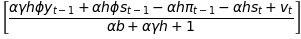

In [10]:
# Solving for y through Sympy 

# Setting AD equal to SRAS 
AD_SRAS = sm.Eq(1/(h*alpha)*(vt-(1+b*alpha)*yt), pit1 + gamma_2*yt - phi*gamma_2*yt1 + st - phi*st1)

# Solving for y 
yt_star = sm.solve(AD_SRAS, yt)

# Printing y*
print(f'The equilibrium value of y is:')
yt_star

We notice that the equilibrium value of $y_t$ is positively dependent of demand shocks in period $t$, negatively dependent of supply shocks in period $t$, while it is positively dependent of supply shocks in period $t-1$. 
Thus a demand shock will increase output in the current period, while a supply shock in period $t$ will decrease the output in the same period, and increase the output in the following period. 

The equilibrium value of pi is:


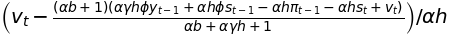

In [11]:
# Solving for pi through Sympy

# Inserting y* in the AD function
pit_star = 1/(h*alpha)*(vt-(1+b*alpha)*yt_star[0])

# Printing pi*
print(f'The equilibrium value of pi is:')
pit_star

We notice that the equilibirum value of $\pi_t$ is positively dependent of a demand shock in period $t$, thouh positively dependent of a supply shock in period $t$ and negatively dependent of a shock in period $t-1$. Additionally, demand shocks have a larger effect, than supply shocks. 
Thus, a positive demand shock in period $t$ will decrease inflation in the same period. Contrary, positive supply shocks will increase inflation in the same period, while they will decrease inflation in the following period.

## Question 2.2

In this question, we calculate the equilibrium of $y^*$ and $\pi^*$ with $v_t = 0$ and $v_t = 0.1$, respectively. After having calculated the equilibrium values, we plot the AD and SRAS curves in both instances. 

In [12]:
# Defining initial variable values 
yt1_int  = 0 
pit1_int = 0 
vt_int   = 0 
st_int   = 0 
st1_int  = 0 
vt_one   = 0.1


# Solving numerically for y 

# Defining a lambda function of yt_eq 
_sol_y_func = sm.lambdify((h,b,alpha,gamma_2,phi,vt,st,pit1,yt1,st1),yt_star[0])

# Defining a function which solve for y, given values and parameters 
def sol_y_func(vt,st,pit1,yt1,st1,h=par['h'],alpha=par['alpha'],b=par['b'],gamma=par['gamma'],phi=par['phi']):
    return _sol_y_func(h,b,alpha,gamma,phi,vt,st,pit1,yt1,st1)

# Solving for y and printing the solution 
y_star = sol_y_func(vt=vt_int,st=st_int,pit1=pit1_int,yt1=yt1_int,st1=st1_int)


# Solving for pi 

# Defining a lambda function of yt_eq 
_sol_pi_func = sm.lambdify((h,b,alpha,gamma_2,phi,yt,vt,st,pit1,yt1,st1),pit_star)

# Defining a function which solve for pi, given values and parameters
def sol_pi_func(vt,st,yt,pit1,yt1,st1,h=par['h'],alpha=par['alpha'],b=par['b'],gamma=par['gamma'],phi=par['phi']):
    return _sol_pi_func(h,b,alpha,gamma,phi,yt,vt,st,pit1,yt1,st1)

# Solving for pi, using the value of y_star, and printing the solution 
pi_star = sol_pi_func(vt=vt_int,st=st_int,yt=y_star,pit1=pit1_int,yt1=yt1_int,st1=st1_int)


In [13]:
# Illustration 

# Define AD and SRAS curves as functions
def AD_curve(h,b,alpha,vt,yt): 
    return 1/(h*alpha)*(vt-(1+b*alpha)*yt)
                               
def SRAS_curve(gamma,phi,pit1,yt,yt1,st,st1): 
    return pit1+gamma*yt-phi*gamma*yt1+st-phi*st1

The equilibrium value of y and pi, given vt = 0: (0.0;0.0)
The equilibrium value of y and pi, given vt = 0.1: (0.0244;0.00183)


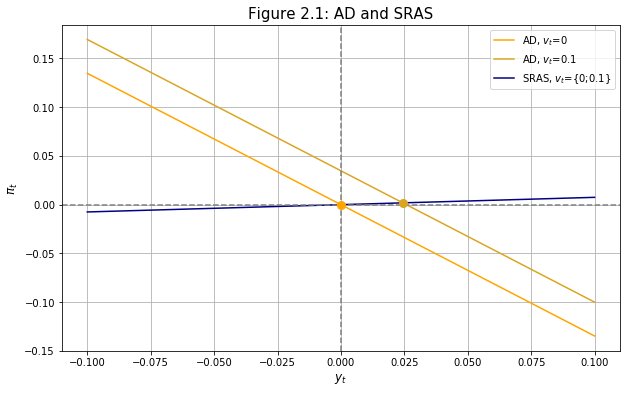

In [14]:
# Calculating equilibrium values for vt = 0 and vt=0.1
y_star_new = sol_y_func(vt=vt_one,st=st_int,pit1=pit1_int,yt1=yt1_int,st1=st1_int)
pi_star_new = sol_pi_func(vt=vt_one,st=st_int,yt=y_star,pit1=pit1_int,yt1=yt1_int,st1=st1_int)
print(f'The equilibrium value of y and pi, given vt = 0: ({y_star};{pi_star})')
print(f'The equilibrium value of y and pi, given vt = 0.1: ({y_star_new:.3};{pi_star_new:.3})')

def austinpowers(): 
    # a. Finding equilibrium given vt=0 and vt=0.1
    y_one = sol_y_func(vt=0,st=st_int,pit1=pit1_int,yt1=yt1_int,st1=st1_int)
    pi_one = sol_pi_func(vt=0,st=st_int,yt=y_star,pit1=pit1_int,yt1=yt1_int,st1=st1_int)
    y_two = sol_y_func(vt=0.1,st=st_int,pit1=pit1_int,yt1=yt1_int,st1=st1_int)
    pi_two = sol_pi_func(vt=0.1,st=st_int,yt=y_star,pit1=pit1_int,yt1=yt1_int,st1=st1_int)

    # b. Constructing curves 
    y = np.linspace(-0.1,0.1,100)
    AD_one = AD_curve(h=par['h'],b=par['b'],alpha=par['alpha'],vt=0,yt=y)
    SRAS_one = SRAS_curve(gamma=par['gamma'],phi=par['phi'],pit1=pit1_int,yt1=yt1_int,st=st_int,st1=st1_int,yt=y)
    AD_two = AD_curve(h=par['h'],b=par['b'],alpha=par['alpha'],vt=0.1,yt=y)
    SRAS_two = SRAS_curve(gamma=par['gamma'],phi=par['phi'],pit1=pit1_int,yt1=yt1_int,st=st_int,st1=st1_int,yt=y)

    # c. Generating graph
    # i.  Font sizes
    title_font = {'size':'15'}
    label_font = {'size':'12'}
    # ii. Graph
    plt.figure(figsize=(10,6))
    plt.plot(y,AD_one,color='orange',label='AD, $v_t$=0')
    plt.plot(y,AD_two,color='goldenrod',label='AD, $v_t$=0.1')
    plt.plot(y,SRAS_one,color='navy',label='SRAS, $v_t$={0;0.1}')
    plt.grid(True)
    # iii. Title and labels
    plt.title('Figure 2.1: AD and SRAS', **title_font)
    plt.xlabel('$y_t$', **label_font)
    plt.ylabel('$\pi_t$', **label_font)
    # c. Add lines and marks which show optimal values of y and pi 
    plt.axvline(y_one, linestyle='dashed', color="grey")
    plt.axhline(pi_one, linestyle='dashed', color="grey")
    plt.plot(y_two,pi_two, marker='o',color='goldenrod',markersize='8')
    plt.plot(y_one,pi_one, marker='o',color='orange',markersize='8')

    plt.legend()

austinpowers();

As expected, we see that a positive demandshock increases both output and inflation. The demand shock pushed the AD curve to the northeast, while the SRAS curve remains unaffected. Consequently, output increases with 0.0244, while inflation only increases with 0.0018. 

## Question 2.3

In question three, we consider an initial demand shock of 0.1, which then converges back to zero. We calculate the sizes of both $v_t$ and $s_t$ in the 1000 periods following the initial shock as well as the short term equilibria for each of the 1000 periods. 
Furthermore, we illustrate the shock and the convergence back to the long run equilibrium with AD and SRAS curves. 

In [15]:
# Constructing AR(1) processes 

# Defining intial values 
y1      = 0
pi_init = 0
s_init  = 0
v_init  = 0
xt      = 0 
ct      = 0 
x0      = 0.1

# Number of variable values 
num_fig = 200
num = 1000

# Creating list, contraining x number values of vt
def v_func(number=num):
    """
    Function which creates list of vt values 
    Args: 
        number = Number of values in list
    Returns:
        List of vt values
    """
    vt = []
    vt_num = par['delta'] * v_init + x0
    vt.append(vt_num)
    for i in range(0,number): 
        vt_i = par['delta']*vt[i] + xt
        vt.append(vt_i)
        
    return vt

vt = v_func(num_fig);
        
# Creating list, contraining x number values of st
def s_func(number=num): 
    """
    Function which creates list of st values
    Args: 
        number: Number of values in list
    Returns: 
        List of st values
    """
    st = []
    st_num = par['omega']* s_init + ct
    st.append(st_num)
    for i in range(0,number):
        st_i = par['omega']*st[i] + ct
        st.append(st_i)
        
    return st
        
st = s_func(num_fig);


In [16]:
# Constructing list of y* and pi*

def y_solve(vt,st,number=num): 
    """
    Solves economy and obtains equilibrum values of y and pi in each period 
    using the sol_y_func function. 
    Args: 
        number: Number of periods 
    Returns: 
        Appends equilibrum values of y to the list y_stars 
        Appends qeuilibrium values of pi to the list pi_stars
    """
    # Initial values of y and pi
    y_stars = [0]
    pi_stars = [0]
    # Appending short run equilibia of y and pi 
    for i in range(1,number):
        # y 
        y_star_i = sol_y_func(vt=vt[i],st=st[i],pit1=pi_stars[i-1],yt1=y_stars[i-1],st1=st[i-1])
        y_stars.append(y_star_i)
        # Pi
        pi_star_i = sol_pi_func(vt=vt[i],st=st[i],yt=y_stars[i],pit1=pi_stars[i-1],yt1=y_stars[i-1],st1=st[i-1])
        pi_stars.append(pi_star_i)
        
    return y_stars, pi_stars

In [17]:
# Illustrating moves in AD and SRAS curves 

# Construcnting v, s and y vectors with 1000 values
vt = v_func();
st = s_func();

y_stars, pi_stars = y_solve(vt,st);


# a. Shocks and Convergence in AD and SRAS curves 
def AD_shock(yt,period, h=par['h'],b=par['b'],alpha=par['alpha'],vt=vt): 
    """Function which generates AD curves following a shock
    Args:
        yt: Vector of y values
        period: Number of periods after initial shock
        h: Parameter 
        b: Parameter 
        alpha: Parameter 
        vt: Vector of shocks
    Returns: 
        AD curve with shocks. 
    """
    if period == 0: # Assuming zero shocks in initial period
        return 1/(h*alpha)*(0-(1+b*alpha)*yt)
    else:
        return 1/(h*alpha)*(vt[period-1]-(1+b*alpha)*yt)
    
def SRAS_shock(yt,period,gamma=par['gamma'],phi=par['phi'],st=st): 
    """Function which generates SRAS curves following a shock
    Args: 
        yt: Vector of y values
        period: Number of periods after initial shock 
        gamma: Parameter
        phi: Parameter
        pi: Vector of pi values
        yt: Vector of y values
        st: Vector of shocks
    Returns: SRAS curve with shocks 
        """
    if period == 0: # Assuming zero shocks in initial period
        return pi_init + gamma*yt - phi*y1 + st[period] - phi*s_init
    else:
        y_values = [0]
        pi_values = [0]
        for i in range(1,num): 
            y_val_i = sol_y_func(vt=vt[i],st=st[i],pit1=pi_stars[i-1],yt1=y_stars[i-1],st1=st[i-1])
            y_values.append(y_val_i)
            pi_val_i = sol_pi_func(vt=vt[i],st=st[i],yt=y_stars[i],pit1=pi_stars[i-1],yt1=y_stars[i-1],st1=st[i-1])
            pi_values.append(pi_val_i)
        return pi_values[period-1] + gamma*yt - phi*gamma*y_values[period-1] + st[period] - phi*st[period-1] 
        

# b. Constructing graph

def sherlock(period): 
    """Constructs figure of convergence in the economy following a shock
    Args: 
        period: Number of periods after inital shock
    Returns: 
        Graph of AD and SRAS curves x periods after a shock
    Note: 
        The graph is meant to be called through the watson function, which turn the graph interactive.
        Thus, the function is not intented to be called on its own
    """
    # i. Constructing curves 
    y = np.linspace(-0.025,0.025,100)
    AD_zero = AD_shock(y,0,vt=vt)
    AD_i = AD_shock(y,period,vt=vt)
    
    SRAS_zero = SRAS_shock(y,0,st=st)
    SRAS_i = SRAS_shock(y,period,st=st)
    
    # ii. Graphs
    # (a) Font sizes
    title_font = {'size':'20'}
    label_font = {'size':'10'}
    # (b) AD curves
    plt.figure(figsize=(12,6))
    plt.plot(y,AD_zero,label=('AD initial'),linewidth=3,color='orange')
    plt.plot(y,AD_i,label='$AD_t$',color='goldenrod')
    
    # (c) SRAS curves
    plt.plot(y,SRAS_zero,label='SRAS initial',linewidth=3,color='navy')
    plt.plot(y,SRAS_i,label='$SRAS_t$',color='purple')
    
    # (d) Graph properties 
    plt.grid(True)
    plt.title('Figure 2.2: AD and SRAS', **title_font)
    plt.xlabel('$y_t$', **label_font)
    plt.ylabel('$\pi_t$', **label_font)
    plt.ylim(-0.1,0.12)

    # d. Add lines which show optimal values of y and pi 
    plt.axvline(y_star, linestyle='dashed', label='$y^*$')
    plt.axhline(pi_star, linestyle='dashed', label='$\pi^*$')
    
    plt.legend()

def lestrade(): 
    widgets.interact(sherlock, 
                     period=widgets.IntSlider(
                         value=0, 
                         description='Period', 
                         min=0,
                         max=50, 
                         step=1, 
                         disabled=False, 
                         continuous_update=False));
    
lestrade();

interactive(children=(IntSlider(value=0, continuous_update=False, description='Period', max=50), Output()), _d…

From figure 2.2 we see that the initial demand in period 1 pushes the AD curve to north east, while the SRAS curve remains unaffected. Consequently, both output and inflation are increased, though the latter is only marginally affected.
In the following periods, the AD curves starts to converge back to point of origin, while the SRAS curve is affected by the changing values in $y_t$ and thus shifts. By 25 periods after the inital shock, the AD curve appears to back at its origin, while the SRAS curve appears to be back after 45 periods. 

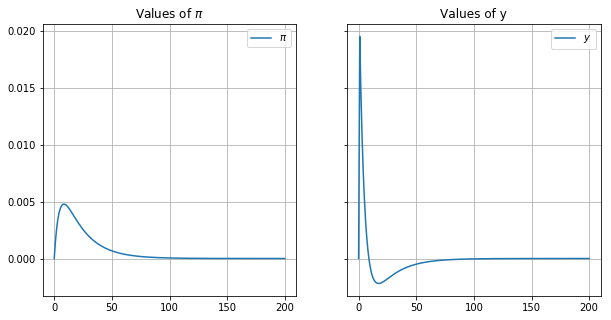

In [18]:
y_stars, pi_stars = y_solve(vt,st,number=num_fig);

# Illustrating the evolution of the economy 
x_axis = np.linspace(0,num_fig,num_fig)

# Constructing graph
f, (ax1, ax2) = plt.subplots(1, 2, sharey=True, figsize=(10,5))
ax1.plot(x_axis,pi_stars, label='$\pi$')
ax1.set_title('Values of $\pi$')
ax1.grid(True)
ax1.legend()
ax2.plot(x_axis,y_stars, label="$y$")
ax2.set_title('Values of y')
ax2.grid(True)
ax2.legend()

plt.show();


Figure 2.3 show the effects of the demand shock to both $\pi_t$ and $y_t$. First, we notice that the effects to $y_t$ are almost four times that of the effects to $\pi_t$ in the first couple of periods following the initial shock. Additioanlly, we see that $\pi_t$ fairly quickly converges back to it's long run equilibrium, while $y_t$ drops and become negative, before it converges back. However, $y_t$ appears to be back at zero around 80 periods after the shock, while it takes $\pi_t$ approximately 120 periods to get back. 

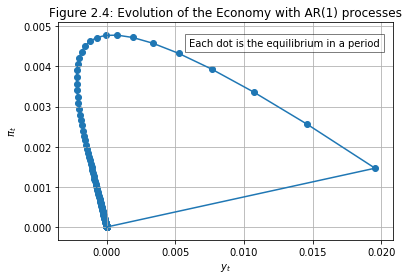

In [19]:
# Illustrating the evolution of the economy 
plt.plot(y_stars,pi_stars)
plt.scatter(y_stars,pi_stars)
plt.grid(True)

plt.title('Figure 2.4: Evolution of the Economy with AR(1) processes')
plt.xlabel('$y_t$')
plt.ylabel('$\pi_t$')
plt.text(0.006,0.0045,'Each dot is the equilibrium in a period', bbox=dict(facecolor='white', alpha=0.5))
    
plt.show();


Figure 2.4 shows the combination of short run equibria $y_t$ and $\pi_t$. We see that the largest effect happens in $y_t$ at the the first period, while the largest effect in $\pi_t$ occurs about nine periods after the shock. 

## Question 2.4

In [20]:
# Generating function to make the demand shock vector
def v_new(num,pars):
    """
    Function which creates list of vt values
    Args: 
        number = Number of values in list
    Returns: 
        Array of vt values 
    """
    vt_sim = np.zeros(num)
    x = np.random.normal(0,pars[0],num)

    for i in range(1,num): 
        vt_i = par['delta']*vt_sim[i-1] + x[i]
        vt_sim[i] += vt_i
    
    return vt_sim


# Generating function to make the supply chok vector
def s_new(num,pars): 
    """
    Function which creates list of st values
    Args: 
        number = Number of values in list
    Returns: 
        Array of st values 
    """
    
    st_sim = np.zeros(num)
    c = np.random.normal(0,pars[1],num)


    for i in range(1,num):
        st_i = par['omega']*st_sim[i-1] + c[i]
        st_sim[i] += st_i
        
    return st_sim


In [21]:
# Illustrating AD and SRAS curves with new shocks 
num = 1000
seed = 11
np.random.seed(seed)

# List of variables to optimize over 
pars = [par['sigma_x'],par['sigma_c'],par['phi']]

# Vectors of vt and st values
vt_new = v_new(num,pars)
st_new = s_new(num,pars)

y_stars, pi_stars = y_solve(vt_new,st_new,number=num);
# b. Constructing graph

def mycraft(period): 
    """Constructs figure of convergence in the economy following a shock
    Args: 
        period: Number of periods after inital shock
    Returns: 
        Graph of AD and SRAS curves with stochastic shocks
    Note: 
        The graph is meant to be called through the irene function, which turn the graph interactive.
        Thus, the function should not be called on its own.
    """
    np.random.seed(seed)
    
    # i. Constructing curves 
    y = np.linspace(-1,1,100)
    AD_zero = AD_shock(y,0,vt=vt_new)
    AD_i = AD_shock(y,period,vt=vt_new)
    
    SRAS_zero = SRAS_shock(y,0,st=st_new)
    SRAS_i = SRAS_shock(y,period,st=st_new)
    
    # ii. Graphs
    # (a) Font sizes
    title_font = {'size':'20'}
    label_font = {'size':'15'}
    # (b) AD curves
    plt.figure(figsize=(12,6))
    plt.plot(y,AD_zero,label=('AD initial'),linewidth=3,color='orange')
    plt.plot(y,AD_i,label='$AD_t$',color='goldenrod')
    
    # (c) SRAS curves
    plt.plot(y,SRAS_zero,label='SRAS initial',linewidth=3,color='navy')
    plt.plot(y,SRAS_i,label='$SRAS_t$',color='purple')
    
    # (d) Graph properties 
    plt.grid(True)
    plt.title('Figure 2.5: AD and SRAS', **title_font)
    plt.ylim(-5,5)
    plt.xlabel('$y_t$', **label_font)
    plt.ylabel('$\pi_t$', **label_font)

    # d. Add lines which show optimal values of y and pi 
    plt.axvline(y_star, linestyle='dashed', label='$y^*$')
    plt.axhline(pi_star, linestyle='dashed', label='$\pi^*$')
    
    plt.legend(loc='upper right')
    


# Turn graph interactive 
def irene(): 
    widgets.interact(mycraft, 
                    period=widgets.Dropdown(
                    description='Period after initial shock', 
                    options=[1,5,10,50,100,200,600,800], 
                    value=1),
                    );
    
#irene();

def moriarty(): 
    widgets.interact(mycraft, 
                     period=widgets.IntSlider(
                         value=0, 
                         description='Period', 
                         min=0,
                         max=999, 
                         step=10, 
                         disabled=False, 
                         continuous_update=False));
    
moriarty();

interactive(children=(IntSlider(value=0, continuous_update=False, description='Period', max=999, step=10), Out…

Figure 2.5 shows the same as figure 2.2, only now the demand shocks and the supply shocks are stochastic, and thus there is no convergence back to zero, as is evident when the sliders is moved from left to the right. 

In [22]:
# Simulating the Economy 

# Adding equilibrum values as initial values 
y_sim = [0]
pi_sim = [0]

for i in range(1,num): 
    y_val_i = sol_y_func(vt=vt_new[i],st=st_new[i],pit1=pi_sim[i-1],yt1=y_sim[i-1],st1=st_new[i-1])
    y_sim.append(y_val_i)
    pi_val_i = sol_pi_func(vt=vt_new[i],st=st_new[i],yt=y_sim[i],pit1=pi_sim[i-1],yt1=y_sim[i-1],st1=st_new[i-1])
    pi_sim.append(pi_val_i)

In [23]:
# Calculate variances of y_sim and pi_sim
y_var = np.var(y_sim)
pi_var = np.var(pi_sim)

# Calculate correlation between y_sim and pi_sim
y_pi_matrix = np.corrcoef(y_sim,pi_sim)
y_pi_corr = y_pi_matrix[0,1]

# Calculate autocorrelations
y_matrix = np.corrcoef(y_sim[:-1],y_sim[1:])
y_corr = y_matrix[0,1]
pi_matrix = np.corrcoef(pi_sim[:-1],pi_sim[1:])
pi_corr = pi_matrix[0,1]

print(f'The variance of y is: {y_var:22.4f}')
print(f'The variance of pi is: {pi_var:21.4f}')
print(f'The correlation between y and pi is: {y_pi_corr:.4f}')
print(f'The autocorrelation of y is: {y_corr:15.4f}')
print(f'The autocorrelation of pi is: {pi_corr:14.4f}')

The variance of y is:                 1.8036
The variance of pi is:                1.2007
The correlation between y and pi is: -0.0826
The autocorrelation of y is:          0.7575
The autocorrelation of pi is:         0.9797


From the above moments, we see that there is a negative correlation between $y_t$ and $\pi_t$, which is opposite of what we would have expected. 
Additionally, we notice that both $y_t$ and $\pi_t$ show persistance, as their autocorrelation is positive. Especially, the inflation is very persistence as the autocorrelation is very close to 1. If it has been 1 all the values of $\pi$ would have been the same. The high autocorrelation could be a result of the flat SRAS curve. 

## Question 2.5

In this question, we calculate the correlation between $y_t$ and $\pi_t$ and plot this correlation as a function of $\phi$. 

The value of phi that makes corr(y,pi) = 0.31 is phi = 0.93


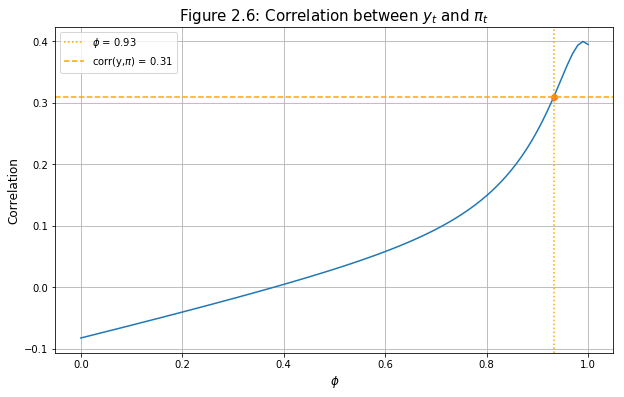

In [24]:
# Defining the correlation as a function 

def superman(s): 
    y_phi = np.zeros(num)
    pi_phi = np.zeros(num)
    for i in range(1,num): 
        y_sim_new = sol_y_func(vt=vt_new[i],st=st_new[i],pit1=pi_phi[i-1],yt1=y_phi[i-1],st1=st_new[i-1],phi=s)
        y_phi[i] = y_sim_new
        pi_sim_new = sol_pi_func(vt=vt_new[i],st=st_new[i],yt=y_phi[i],pit1=pi_phi[i-1],yt1=y_phi[i-1],st1=st_new[i-1],phi=s)
        pi_phi[i] = pi_sim_new
    
    return np.corrcoef(y_phi,pi_phi)[0,1]

# Finding the value of phi which give the correlation 0.31
x0 = 0 
def batman(x):
    return (superman(x)-0.31)**2

obj_func = lambda x: superman(x)-0.31

result = optimize.minimize(batman,x0)
phi_val = result.x[0]
print(f'The value of phi that makes corr(y,pi) = 0.31 is phi = {phi_val:.2f}')

# Plot 
x = np.linspace(0,1,100)
y = np.empty(100)
for i,X in enumerate(x):
    y[i] = superman(X)
    
# i.  Font sizes
title_font = {'size':'15'}
label_font = {'size':'12'}
# ii. Figure
plt.figure(figsize=(10,6))
plt.plot(x,y)
plt.plot(phi_val,0.31, marker='o')
plt.axvline(phi_val, linestyle='dotted', color="orange", label=f'$\phi$ = {phi_val:.2f}')
plt.axhline(0.31, linestyle='dashed', color="orange", label='corr(y,$\pi$) = 0.31')
plt.title('Figure 2.6: Correlation between $y_t$ and $\pi_t$', **title_font)
plt.xlabel('$\phi$', **label_font)
plt.ylabel('Correlation', **label_font)
plt.grid(True)
plt.legend()

plt.show();



Figure 2.6 shows the correlation between $y_t$ and $\pi_t$ as a function of $\phi$. We notice that the correlation increases in $\phi$, meaning the more weight put on the past expected inflation instead of the past actual inflation when forming the present expectations to the inflation, the more closely $y_t$ and $\pi_t$ are correlated. 

When $\phi = 0.93$, the correlation between $y_t$ and $\pi_t$ equals $0.31$, which is equal the to correlation between the two in the US economy. 

## Quesiton 2.6

In question 2.6 when optimize $\sigma_x$, $\sigma_c$ and $\phi$ in order to obtain moments of the model corresponding the the moments of the US economy. This is done using the scipy function optimze. 

In [25]:
# Defining function that returns the vectors of the equilibruim y and pi
def superman(num, pars):
    """
    Simulates y and pi values given shocks
    Args: 
        num: Number of values in each array
        pars: Dictionary of parameter values
    Returns: 
        Array of simulated y values, y_sim
        Array of simulated pi values pi_sim
    """
    y_sim = np.zeros(num)
    pi_sim = np.zeros(num)
    
    vt_sim = v_new(num,pars)
    st_sim = s_new(num,pars)

    for i in range(1,num): 
        y_val_i = sol_y_func(vt=vt_sim[i],st=st_sim[i],pit1=pi_sim[i-1],yt1=y_sim[i-1],st1=st_sim[i-1],phi=pars[2])
        y_sim[i] += y_val_i
        pi_val_i = sol_pi_func(vt=vt_sim[i],st=st_sim[i],yt=y_sim[i],pit1=pi_sim[i-1],yt1=y_sim[i-1],st1=st_sim[i-1],phi=pars[2])
        pi_sim[i] += pi_val_i

    return y_sim, pi_sim

# Defining function that returns the variance, correlation, and autocorrelation of y and pi 
def batman(num, pars): # ar_corr_acorr
    """
    Estimates variance of y, variance of pi, correlation between y and pi
    autocorrelation of y and autocorrelation of pi
    Arg: 
        num: Number of values in each y and pi array
        pars: Dictionary of parameter values
    Returns: 
        Variance of y, var_y
        Variance of pi, var_pi
        Correlation between y and pi, corr_ypi
        Autocorrelaiton of y, acorr_y
        Autocorrelation of pi, acorr_pi
    """
    y_sim, pi_sim = superman(num, pars)
    
    var_y = np.var(y_sim)
    var_pi = np.var(pi_sim)
    corr_ypi = np.corrcoef(y_sim,pi_sim)[0,1]
    acorr_y = np.corrcoef(y_sim[:-1],y_sim[1:])[0,1]
    acorr_pi = np.corrcoef(pi_sim[:-1],pi_sim[1:])[0,1]
    
    return var_y, var_pi, corr_ypi, acorr_y, acorr_pi


In [26]:
# Define function which finds the parameters of sigma_x, sigma_c and phi that minimize the difference 
# between moments of the model with the moments of the US economy
def wolverine(num):
    """
    Function finds values of sigma_x, sigma_c and phi which minimize the diffence between the 
    moments of the model and the moments of the US economy
    Args: 
        num: Number of simulations 
    Returns: 
        Results from optimization process
    """
       
    def _flash(num,pars): 
        seed = 11
        np.random.seed(seed)
        
        var_y, var_pi, corr_ypi, acorr_y, acorr_pi = batman(num, pars)

        test = np.zeros(5)
        
        test[0] += (var_y-1.64)**2
        test[1] += (var_pi-0.21)**2
        test[2] += (corr_ypi-0.31)**2
        test[3] += (acorr_y-0.84)**2
        test[4] += (acorr_pi-0.48)**2
        
        return  np.sum(test)
    
    flash= lambda x: _flash(num,x)
    
    x0 = [par['sigma_x'], par['sigma_c'],phi_val]
    bounds = ((0.0001,10000000), (0.0001,10000000), (0,1))
    
    result = optimize.minimize(flash,x0,
                           method='SLSQP',
                           bounds=bounds    
                           )
    
    return result

result = wolverine(num)
var_y, var_pi, corr_ypi, acorr_y, acorr_pi = batman(num, result.x)
print(f'{result.message}\n')

text = f'The optimal values of the parameters is:\n'
text += f'sigma_x = {result.x[0]:.3f}\n'
text += f'sigma_c = {result.x[1]:.3f}\n'
text += f'phi     = {result.x[2]:.3f}\n \n'
print(text)

text = f'The moments of the model and the US economy are: \n'
text += f'             The model  US economy \n'
text += f'var(y):         {var_y:.2f}       {1.64}\n'
text += f'var(pi):        {var_pi:.2f}       {0.21}\n'
text += f'corr(y,pi):     {corr_ypi:.2f}       {0.31}\n'
text += f'corr(y,y_1):    {acorr_y:.2f}       {0.84}\n'
text += f'corr(pi,pi_1):  {acorr_pi:.2f}       {0.48}\n'

print(text)

Optimization terminated successfully.

The optimal values of the parameters is:
sigma_x = 3.124
sigma_c = 0.219
phi     = 0.951
 

The moments of the model and the US economy are: 
             The model  US economy 
var(y):         1.57       1.64
var(pi):        0.06       0.21
corr(y,pi):     0.33       0.31
corr(y,y_1):    0.79       0.84
corr(pi,pi_1):  0.41       0.48



Though our optimzer does terminate successfully, we see that some of the moments of our model are still relatively far from the moments of the US economy. This can be due to several factors, e.g. the initial guess or the method chosen in the optimizing process. Another possibility is that the AS-AD model does not describe the eceonomy to its fullest and therefore cannot simulate the exact moments of the US economy. 

# Problem 3: Exchange economy

In [27]:
## FROM EXAM-SHEET
# a. parameters
N = 50000
mu = np.array([3,2,1])
Sigma = np.array([[0.25, 0, 0], [0, 0.25, 0], [0, 0, 0.25]])
gamma = 1
zeta = 1

# b. random draws
seed = 1986
np.random.seed(seed)

# preferences
alphas = np.exp(np.random.multivariate_normal(mu, Sigma, size=N))
betas = alphas/np.reshape(np.sum(alphas,axis=1),(N,1))

# endowments
e1 = np.random.exponential(zeta,size=N)
e2 = np.random.exponential(zeta,size=N)
e3 = np.random.exponential(zeta,size=N)

## Question 3.1
We plot budget-shares by plotting $\beta$'s, since we have that demand for consumer $j$ is given by:
$$
x^{*j}_1 = \beta^j_i \frac{I_j}{p_i}
$$
and budget-share thereby is given by:
$$
\frac{p_i*x^{*j}_1}{I_j} = \frac{p_i \cdot \beta^j_i \frac{I_j}{p_i}}{I_j} = \beta^j_i
$$

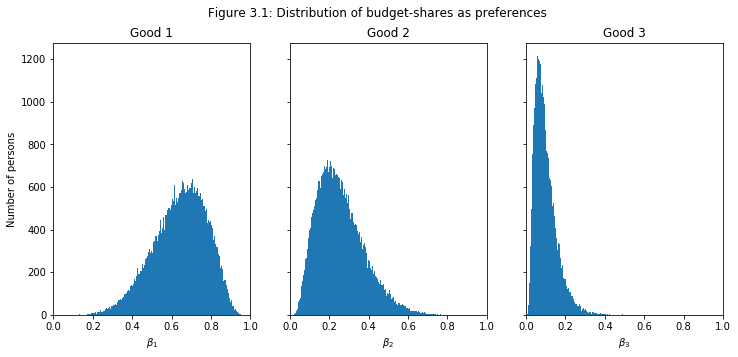

The mean is:     0.642                        0.258                          0.100
The variance is: 0.018                        0.014                          0.003



In [28]:
# Plotting budget shares

# Substracting beta-1's, beta-2's, and beta-3's
beta_1s = betas[:,0]
beta_2s = betas[:,1]
beta_3s = betas[:,2]

# Initiating subplot
fig1, (ax1,ax2,ax3) = plt.subplots(nrows=1,ncols=3,sharey=True,figsize=(12,5))

fig1.suptitle('Figure 3.1: Distribution of budget-shares as preferences')

# Plotting histogram of each beta-value, setting titles, labels, and limits for each plot
ax1.hist(beta_1s, bins=200)
ax1.set_title('Good 1')
ax1.set_xlabel('$\\beta_1$')
ax1.set_ylabel('Number of persons')
ax1.set_xlim(0,1)

ax2.hist(beta_2s, bins=200)
ax2.set_title('Good 2')
ax2.set_xlabel('$\\beta_2$')
ax2.set_xlim(0,1)

ax3.hist(beta_3s, bins=200)
ax3.set_title('Good 3')
ax3.set_xlabel('$\\beta_3$')
ax3.set_xlim(0,1);

plt.show()


text = f'The mean is: {np.mean(betas[:,0]):9.3f} {np.mean(betas[:,1]):28.3f} {np.mean(betas[:,2]):30.3f}\n'
text += f'The variance is: {np.var(betas[:,0]):.3f} {np.var(betas[:,1]):28.3f} {np.var(betas[:,2]):30.3f}\n'


print(text)

From the three histograms above we see the distribution of preferences for the three goods are quite different. Good 1 has a relatively large spread, and the highest mean of the three. Good 2 also has a relatively large spread, but a smaller mean. Good 3 has the smallest mean and variance.
The distributions indicate that people have a higher preference of good 1 and good 2, with good 1 being the preferred good. People generally have a dispreference for good 3, compared to the other two.

**OBS: Jeg (Jakob) har tilføjet gns og varians nedenunder figuren, da teksten bruger det en del. Tilpas det hvis I synes**

## Question 3.2

In [29]:
# Defining functions calculating demand of each good
def demand_good1(p1,p2,e1,e2,e3,betas):
    """
    Calculating demand for good 1
    
    Args:
        p1 (type: float): Price for good 1
        p2 (type: float): Price for good 2
        e1 (type: numpy array): Endowments of good 1
        e2 (type: numpy array): Endowments of good 2
        e3 (type: numpy array): Endowments of good 3
        betas (type: numpy ndarray): Preferences for goods
        
    Returns:
        (type: float): Demand for good 1
    """
    I = e1*p1+e2*p2+e3
    return betas[:,0]*I/p1

def demand_good2(p1,p2,e1,e2,e3,betas):
    """
    Calculating demand for good 2
    
    Args:
        p1 (type: float): Price for good 1
        p2 (type: float): Price for good 2
        e1 (type: numpy array): Endowments of good 1
        e2 (type: numpy array): Endowments of good 2
        e3 (type: numpy array): Endowments of good 3
        betas (type: numpy ndarray): Preferences for goods
        
    Returns:
        (type: float): Demand for good 2
    """
    I = e1*p1+e2*p2+e3
    return betas[:,1]*I/p2

def demand_good3(p1,p2,e1,e2,e3,betas):
    """
    Calculating demand for good 3
    
    Args:
        p1 (type: float): Price for good 1
        p2 (type: float): Price for good 2
        e1 (type: numpy array): Endowments of good 1
        e2 (type: numpy array): Endowments of good 2
        e3 (type: numpy array): Endowments of good 3
        betas (type: numpy ndarray): Preferences for goods
        
    Returns:
        (type: float): Demand for good 3
    """
    I = e1*p1+e2*p2+e3
    return betas[:,2]*I

In [30]:
def excess_good1(p1,p2,e1,e2,e3,betas):
    """
    Calculating excess demand of good 1
    
    Args:
        p1 (type: float): Price for good 1
        p2 (type: float): Price for good 2
        e1 (type: numpy array): Endowments of good 1
        e2 (type: numpy array): Endowments of good 2
        e3 (type: numpy array): Endowments of good 3
        betas (type: numpy ndarray): Preferences for goods
        
    Returns:
        excess (type: float): Excess demand of good 1
    """
    # Summing array of demand
    demand = np.sum(demand_good1(p1,p2,e1,e2,e3,betas))
    # Summing array of enowments
    supply = np.sum(e1)
    # Calculating excess demand
    excess = demand-supply
    return excess

def excess_good2(p1,p2,e1,e2,e3,betas):
    """
    Calculating excess demand of good 2
    
    Args:
        p1 (type: float): Price for good 1
        p2 (type: float): Price for good 2
        e1 (type: numpy array): Endowments of good 1
        e2 (type: numpy array): Endowments of good 2
        e3 (type: numpy array): Endowments of good 3
        betas (type: numpy ndarray): Preferences for goods
        
    Returns:
        excess (type: float): Excess demand of good 2
    """
    # Summing array of demand
    demand = np.sum(demand_good2(p1,p2,e1,e2,e3,betas))
    # Summing array of endowments
    supply = np.sum(e2)
    # Calculating excess demand
    excess = demand-supply
    return excess

def excess_good3(p1,p2,e1,e2,e3,betas):
    """
    Calculating excess demand of good 3
    
    Args:
        p1 (type: float): Price for good 1
        p2 (type: float): Price for good 2
        e1 (type: numpy array): Endowments of good 1
        e2 (type: numpy array): Endowments of good 2
        e3 (type: numpy array): Endowments of good 3
        betas (type: numpy ndarray): Preferences for goods
        
    Returns:
        excess (type: float): Excess demand of good 3
    """
    # Summing array of demand
    demand = np.sum(demand_good3(p1,p2,e1,e2,e3,betas))
    # Summing array of endowments
    supply = np.sum(e3)
    # Calculating excess demand
    excess = demand-supply
    return excess

# Choosing number of price-values to plot function for
size = 100

# Generating arrays of prices
p1_s = np.linspace(0.5,10,size)
p2_s = np.linspace(0.5,10,size)

# Initiating empty grids for excess demands
excess_1_grid = np.empty((size,size))
excess_2_grid = np.empty((size,size))
excess_3_grid = np.empty((size,size))


# Transforming price-vectors to grids
p1_grid, p2_grid = np.meshgrid(p1_s, p2_s,indexing='ij') 

# Calculating excess-demands for each price-combination
for i,p1 in enumerate(p1_s):
    for j,p2 in enumerate(p2_s):
        excess_1_grid[i,j] = excess_good1(p1,p2,e1,e2,e3,betas)
        excess_2_grid[i,j] = excess_good2(p1,p2,e1,e2,e3,betas)
        excess_3_grid[i,j] = excess_good3(p1,p2,e1,e2,e3,betas)

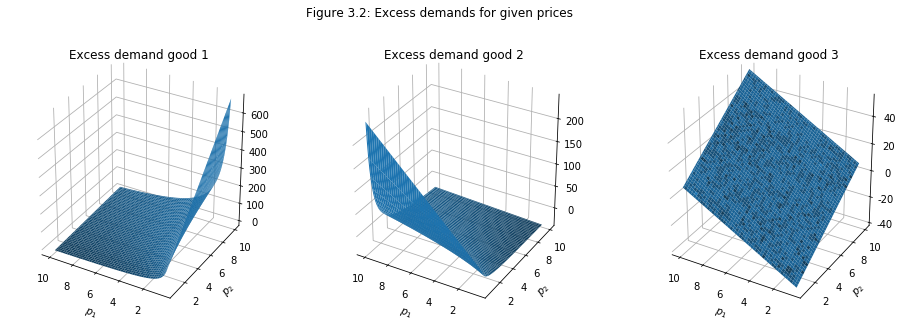

Note: z-axis displayed in thousands


In [31]:
# Function to convert z-ticks to thousands
def thousands(x, pos):
    return '%1.0f' % (x*1e-3)

# Calling formatter
formatter = FuncFormatter(thousands)

# Initiating figure
fig = plt.figure(figsize=(16,5))

fig.suptitle('Figure 3.2: Excess demands for given prices')

# Creating 3-d-subplots and setting properties
ax1 = fig.add_subplot(131, projection='3d')
fig1 = ax1.plot_surface(p1_grid,p2_grid,excess_1_grid)
ax1.invert_xaxis()
ax1.set_title('Excess demand good 1')
ax1.set_xlabel('$p_1$')
ax1.set_ylabel('$p_2$')

# Formatting z-ticks to thousands
ax1.zaxis.set_major_formatter(formatter)

ax1.w_xaxis.set_pane_color((1.0, 1.0, 1.0, 1.0))
ax1.w_yaxis.set_pane_color((1.0, 1.0, 1.0, 1.0))
ax1.w_zaxis.set_pane_color((1.0, 1.0, 1.0, 1.0))

ax2 = fig.add_subplot(132, projection='3d')
ax2.plot_surface(p1_grid,p2_grid,excess_2_grid)
ax2.invert_xaxis()
ax2.set_title('Excess demand good 2')
ax2.set_xlabel('$p_1$')
ax2.set_ylabel('$p_2$') 

# Formatting z-ticks to thousands
ax2.zaxis.set_major_formatter(formatter)

ax2.w_xaxis.set_pane_color((1.0, 1.0, 1.0, 1.0))
ax2.w_yaxis.set_pane_color((1.0, 1.0, 1.0, 1.0))
ax2.w_zaxis.set_pane_color((1.0, 1.0, 1.0, 1.0))

ax3 = fig.add_subplot(133, projection='3d')
ax3.plot_surface(p1_grid,p2_grid,excess_3_grid)
ax3.invert_xaxis()
ax3.set_title('Excess demand good 3')
ax3.set_xlabel('$p_1$')
ax3.set_ylabel('$p_2$') 

# Formatting z-ticks to thousands
ax3.zaxis.set_major_formatter(formatter)

ax3.w_xaxis.set_pane_color((1.0, 1.0, 1.0, 1.0))
ax3.w_yaxis.set_pane_color((1.0, 1.0, 1.0, 1.0))
ax3.w_zaxis.set_pane_color((1.0, 1.0, 1.0, 1.0))

plt.show() 

print('Note: z-axis displayed in thousands')

The two figures above show excess demands of good 1 and 2 as functions of prices on these goods. From here we se that excess demand is generally decreasing in the goods own prices. The reason is that when the good is cheaper there is a higher demand and thereby also excess demand because the supply is fixed. But the excess demand depends on both prices and from the figures in figure 3.2, the walras prices, i.e. the prices that clears all markets, cannot be seen. We will find these by optimizing through the tâtonnement process below.

**Kom fra Jake: Lidt sent måske at sige dette, men bør vi egentlig ikke have excess demand for good 3 også? i opgaven står der at vi skal vise excess demands og det inkludere vil også good 3. Den er vil særlig relevant da den må forvente at have høj excess demand når p1 og p2 er høje samtidig. Jeg har lige prøvet at sætte det ind. Hvis I synes den skal med må i lige tjekke koden er som den skal være - umiddelbart ser den lidt sjov ud selvom det gør som den skal (altså excess demand stiger i p1 og p2. Hvis den skal med skal den også lige kort kommenteres. Fx: "As seen from the third panel, the excess demand for good 3 increases in the prices of good 1 and 2. This makes perfect sense as the prices of good 1 and 2 are meassured relatively to the price of good 3. Thus, as the prices of good 1 and 2 to increases good 3 becomes relatively cheaper, and the demand increases."**

### Question 3.3

In [32]:
def tatonnement(p1,p2,e1,e2,e3,betas,tol=1e-7,kappa=0.1,prints=True):
    """
    Finds Walras-euilibrium prices through tâtonnement process, and printing (if chosen) iteration process
    
    Args:
        p1 (type: float): Starting guess on price for good 1
        p2 (type: float): Starting guess on price for good 2
        e1 (type: numpy array): Endowments of good 1
        e2 (type: numpy array): Endowments of good 2
        e3 (type: numpy array): Endowments of good 3
        betas (type: numpy ndarray): Preferences for goods
        tol (type: float): Tolerance level for excess demands. Operates as substitute for zero
        kappa (type: float): Conversion aggresivity
        prints (type: boolean): Boolean deciding whether to print iteration process or not
        
    Returns:
        p1_star (type: float (or None if no convergence)): Equilibrium price for good 1
        p2_star (type: float (or None if no convergence)): Equilibrium price for good 2
    """
    
    # Calculating initial excess demands
    ex_1 = excess_good1(p1,p2,e1,e2,e3,betas)
    ex_2 = excess_good2(p1,p2,e1,e2,e3,betas)
    
    # Print starting values
    if prints:
        print(f'Start:{" ":6s} excess good 1 = {ex_1:10.4f}, excess good 2 = {ex_2:10.4f} with p1 = {p1:10.6f}, p2 = {p2:10.6f} \n')
    
    # Setting iteration counter
    t = 1
    
    # Looping for a maximum of 100000 iterations
    while t < 100000:
        
        # Calculating initial excess demands
        ex_1 = excess_good1(p1,p2,e1,e2,e3,betas)
        ex_2 = excess_good2(p1,p2,e1,e2,e3,betas)

        # Checking whether excess demands has converged to below tolerance level
        if abs(ex_1)<tol and abs(ex_2)<tol:
            # Printing (if chosen) and setting equilibrium prices, an returning function (so it stops)
            if prints:
                print(f'\nPrices in Walras equilibrium are: p1 = {p1:.3f} and p2 = {p2:.3f}')
            p1_star = p1
            p2_star = p2
            return p1_star, p2_star

        # If excess demands have not converged, prices are adjusted by average excess demand multiplied by kappa
        else:
            p1 += kappa*ex_1/N
            p2 += kappa*ex_2/N

        # Print iteration process    
        if prints:
            if t <= 5:
                print(f'Iter {t:6.0f}: excess good 1 = {ex_1:10.4f}, excess good 2 = {ex_2:10.4f} ---> p1 = {p1:10.6f}, p2 = {p2:10.6f}')
                time.sleep(.5)

            if t == 5:
                print('\n...\n')

            if t%1000 == 0:
                print(f'Iter {t:6.0f}: excess good 1 = {ex_1:10.4f}, excess good 2 = {ex_2:10.4f} ---> p1 = {p1:10.6f}, p2 = {p2:10.6f}')

        # Updating iteration counter
        t += 1
        
    # Print statement if maximum numbers of iterations is exceeded
    if t == 100000: 
        text = 'Excess demands did not converge \n'
        text += f'Excess good 1 = {ex_1:10.4f} and excess good 2 = {ex_2:10.4f}'
        text += f'Prices at p1 = {p1:10.6f} and p2 = {p2:10.6f}'
        print(text)
        return None, None

In [33]:
# Finding Walras-equilibrium prices

# Initial guess on prices
p1 = 10
p2 = 2

# Calling function to find equilibrium prices
p1_star, p2_star = tatonnement(p1,p2,e1,e2,e3,betas)

Start:       excess good 1 = -8229.9057, excess good 2 = 33953.2761 with p1 =  10.000000, p2 =   2.000000 

Iter      1: excess good 1 = -8229.9057, excess good 2 = 33953.2761 ---> p1 =   9.983540, p2 =   2.067907
Iter      2: excess good 1 = -7996.8734, excess good 2 = 31524.8187 ---> p1 =   9.967546, p2 =   2.130956
Iter      3: excess good 1 = -7779.1018, excess good 2 = 29404.3235 ---> p1 =   9.951988, p2 =   2.189765
Iter      4: excess good 1 = -7574.6873, excess good 2 = 27532.7659 ---> p1 =   9.936839, p2 =   2.244830
Iter      5: excess good 1 = -7382.0917, excess good 2 = 25865.8947 ---> p1 =   9.922075, p2 =   2.296562

...

Iter   1000: excess good 1 =  -577.5643, excess good 2 =  -215.2719 ---> p1 =   7.189169, p2 =   2.877381
Iter   2000: excess good 1 =  -110.2233, excess good 2 =   -41.1123 ---> p1 =   6.612840, p2 =   2.662496
Iter   3000: excess good 1 =   -18.2890, excess good 2 =    -6.8226 ---> p1 =   6.510114, p2 =   2.624177
Iter   4000: excess good 1 =    -2.956

From the process above we see how adjusting prices subject to the excess demands lets prices converge to their Walras-equilibrium values. By setting excess demand equal to zero in two of the market, the third market clears as well. The high price of good 1 is caused by higher preferences for this good, cf. figure 3.1. As the supplies of all the goods are almost the same, the price of good 1 has to be high in order for the markets to clear. The same arguement apply to the fact the price on good 2 is higher than 1, i.e. is more expensive than good 3.

### Question 3.4

In [34]:
def utility(p1, p2, e1, e2, e3, betas, gamma):
    """
    Calculating utility
    
    Args:
        p1 (type: float): Starting guess on price for good 1
        p2 (type: float): Starting guess on price for good 2
        e1 (type: numpy array): Endowments of good 1
        e2 (type: numpy array): Endowments of good 2
        e3 (type: numpy array): Endowments of good 3
        betas (type: numpy ndarray): Preferences for goods
        gamma (type: float): Utility scalar
    
    Returns:
        util (type: numpy array): Vector of utility-values 
    """
    # Calculating income
    I = p1*e1+p2*e2+e3
    
    # Calculating demands based on given prices, preferences and income
    x_1 = betas[:,0]*(I/p1)
    x_2 = betas[:,1]*(I/p2)
    x_3 = betas[:,2]*I
    
    # Calculating utility
    util = (x_1**betas[:,0]+x_2**betas[:,1]+x_3**betas[:,2])**gamma
    return util

The distribution of the utilities has a mean of 2.967 and a variance of 0.512


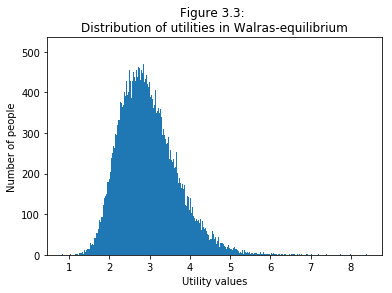

In [35]:
# Calling function to find vector of utilities
u_vec = utility(p1_star, p2_star, e1, e2, e3, betas, gamma)

# Plotting distribution of utilities, and printing mean and variance
plt.hist(u_vec, bins=500)
plt.title('Figure 3.3: \nDistribution of utilities in Walras-equilibrium')
plt.xlabel('Utility values')
plt.ylabel('Number of people')
mean = np.mean(u_vec)
var = np.var(u_vec)
print(f'The distribution of the utilities has a mean of {mean:.3f} and a variance of {var:.3f}')

From the figure above we see how utilities are distributed in the Walras-equilibrium. The variance of the utility-distribution is determined by peoples endowments and preferences. People having a larger endowment of good 1, which is relatively expensive, and high preferences for good 2 and 3, which are relatively cheap, have higher utilities. Either they ahve a higher income or the are able to 'buy' more utility for the same money. 

### Question 3.5

In [36]:
# Set new set of endowments, equal to mean of each initial endowment
e1_new = np.zeros(N)+np.mean(e1)
e2_new = np.zeros(N)+np.mean(e2)
e3_new = np.zeros(N)+np.mean(e3)

p1 = 10
p2 = 2

p1_star_new, p2_star_new = tatonnement(p1,p2,e1_new,e2_new,e3_new,betas)

Start:       excess good 1 = -8246.4733, excess good 2 = 34022.6195 with p1 =  10.000000, p2 =   2.000000 

Iter      1: excess good 1 = -8246.4733, excess good 2 = 34022.6195 ---> p1 =   9.983507, p2 =   2.068045
Iter      2: excess good 1 = -8012.9554, excess good 2 = 31586.7949 ---> p1 =   9.967481, p2 =   2.131219
Iter      3: excess good 1 = -7794.7436, excess good 2 = 29460.2821 ---> p1 =   9.951892, p2 =   2.190139
Iter      4: excess good 1 = -7589.9263, excess good 2 = 27583.7185 ---> p1 =   9.936712, p2 =   2.245307
Iter      5: excess good 1 = -7396.9587, excess good 2 = 25912.6183 ---> p1 =   9.921918, p2 =   2.297132

...

Iter   1000: excess good 1 =  -577.8899, excess good 2 =  -215.6924 ---> p1 =   7.184463, p2 =   2.878055
Iter   2000: excess good 1 =  -109.9982, excess good 2 =   -41.0852 ---> p1 =   6.608340, p2 =   2.662948
Iter   3000: excess good 1 =   -18.2017, excess good 2 =    -6.7995 ---> p1 =   6.505925, p2 =   2.624692
Iter   4000: excess good 1 =    -2.934

By finding Walras-equilibrium prices for a situation, where everyone is given the same endowment equal to the mean of the previous endowments, we see that prices do not change significantly, but are virtually the same. From this we see that prices are not determined by the distribution of endowments, but rahter preferences. This is not surprising as the total supplies of the three goods have not changed, and we concluded in question 4 that prices were set to offset the differences in preferences.

In [37]:
# Calculating utlities for different values of gamma
gamma_list = [.5,.8,1,1.5,2]
u_vec_list = []
u_vec_new_list = []

for j,gamma in enumerate(gamma_list):
    u_vec_new_list.append(utility(p1_star_new, p2_star_new, e1_new, e2_new, e3_new, betas, gamma))
    u_vec_list.append(utility(p1_star, p2_star, e1, e2, e3, betas, gamma))


In [38]:
def _disfig(gamma):
    """
    Function to be called in interactive figure
    
    Args:
        gamma (type: float): Utility scalar, which is defined by widgets.interact
        
    Returns:
        None
        
    Note:
        Uses values for equilibrium prices, endowments, and preferences, which are all defined earlier in the code.
        Plots two figures and prints text containing mean and variance.
    """
    # Calculate utility-vectors
    u_vec_new = u_vec_new_list[gamma_list.index(gamma)]
    u_vec = u_vec_list[gamma_list.index(gamma)]

    # Calculate means and variances
    mean_new = np.mean(u_vec_new)
    var_new = np.var(u_vec_new)
    mean = np.mean(u_vec)
    var = np.var(u_vec)

    # Initiate subplot-figure
    fig, (ax1, ax2) = plt.subplots(nrows=1,ncols=2,sharex=True,sharey=True,figsize=(12,5))

    # Plot utility distributions and set figure-properties
    ax1.hist(u_vec_new, bins=500)
    ax1.set_title('Distribution of utilites with \nequally distributed endowments')
    ax1.set_xlabel('Utility-value')
    ax1.set_ylabel('Number of people')

    ax2.hist(u_vec, bins=500)
    ax2.set_title('Distribution of utilities with \nexponential distributed endowments')
    ax2.set_xlabel('Utility-value')

    # Print text containing means and variances
    ax1_text = f'Mean = {mean_new:.3f}, Variance = {var_new:.3f}'
    ax2_text = f'Mean = {mean:.3f}, Variance = {var:.3f}'
    
    text = f'{" ":13s}'
    text += f'Mean = {mean_new:.3f}, variance = {var_new:.3f}'
    text += f'{" ":15s}'
    text += f'Mean = {mean:.3f}, variance = {var:.3f}' 
    
    
    plt.show()
    print(text)

# Calling interactive function
widgets.interact(_disfig,
                gamma = widgets.RadioButtons(
                description = '$\\gamma$',
                options=gamma_list,
                value=0.8));

interactive(children=(RadioButtons(description='$\\gamma$', index=1, options=(0.5, 0.8, 1, 1.5, 2), value=0.8)…

From the figures and calculated moments above we see that the distribution of the utilites change alot although prices do not. In a situation with equal endowment the utility distribution has a low variance compared to a situation with exponential distributed endowments, although the means are close to identical. The variance decreases because now there is only one factor contrinuting to the utility, that is the preferences. Before the income also varied between the people as they had different endowments whereas they all have the same endowment now. <br>
By changing the value of $\gamma$, we see that the variance in both situations increases. The reason is that $\gamma$ scale the utility up or down. Consequently, as $\gamma$ goes towards 0 the variance goes towards 0, and as $\gamma$ goes towards $\infty$ the variance goes towards $\infty$ as well.